In [94]:
input_data = 'Heart.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [95]:
df = pd.read_csv(input_data)
df.head(5)  # oldpeak, slp, thall沒有欄位說明

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
# 資料看起來挺乾淨
display(df.describe())
display(df.info())
display(df.nunique())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [97]:
y = df['output']
X = df.drop('output', axis=1)
y.value_counts()  # 了解目標值分布，避免太不均衡

1    165
0    138
Name: output, dtype: int64

In [98]:
num_features = []  # 數值型欄位
obj_features = []  # 類別型

for col in X.columns:
    if X[col].nunique() > 5:
        num_features.append(col)
    else:
        obj_features.append(col)
len(num_features)

5

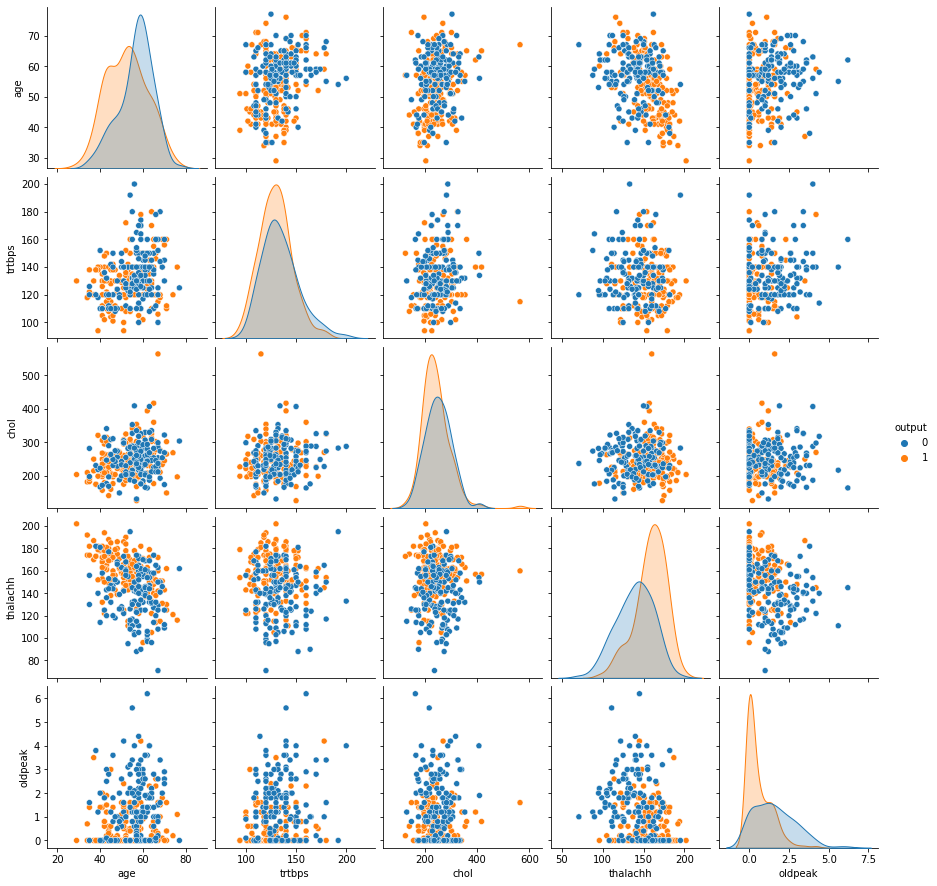

In [99]:
# 數值化欄位與y視覺化
# 可以粗略地看到，心臟病高風險與低風險的人在'age', 'thalachh'(maximum heart rate achieved), 'oldpeak'的分佈呈現較明顯的差異
df_vis = pd.concat([df[num_features], df['output']], axis=1)
sns.pairplot(df_vis, hue='output')

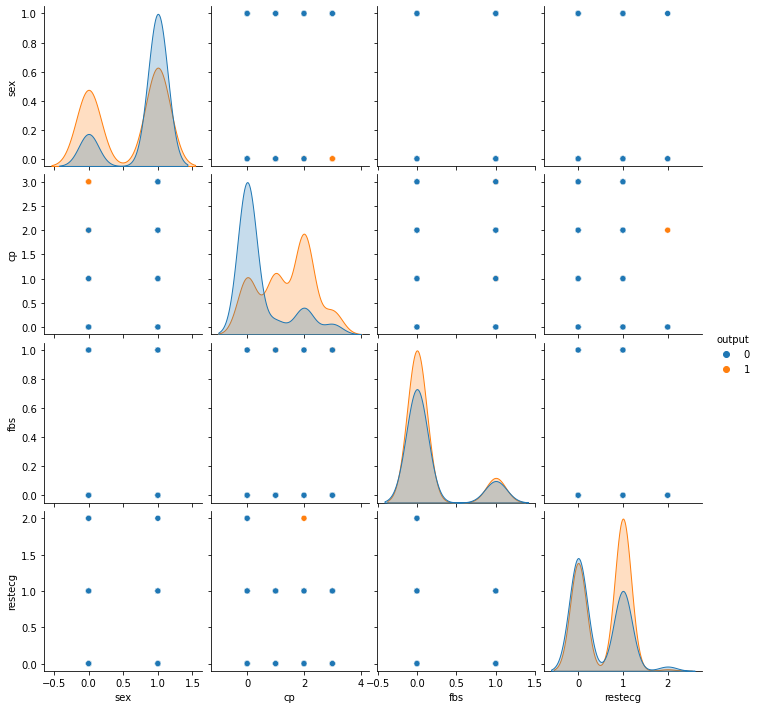

In [100]:
# 類別型欄位與y視覺化
# 從這邊可以看出，分布比較明顯有差異的變數為'sex', 'cp', 'exng', 'caa', 'thall', 'slope'
df_vis = pd.concat([df[obj_features[:4]], df['output']], axis=1)
sns.pairplot(df_vis, hue='output')

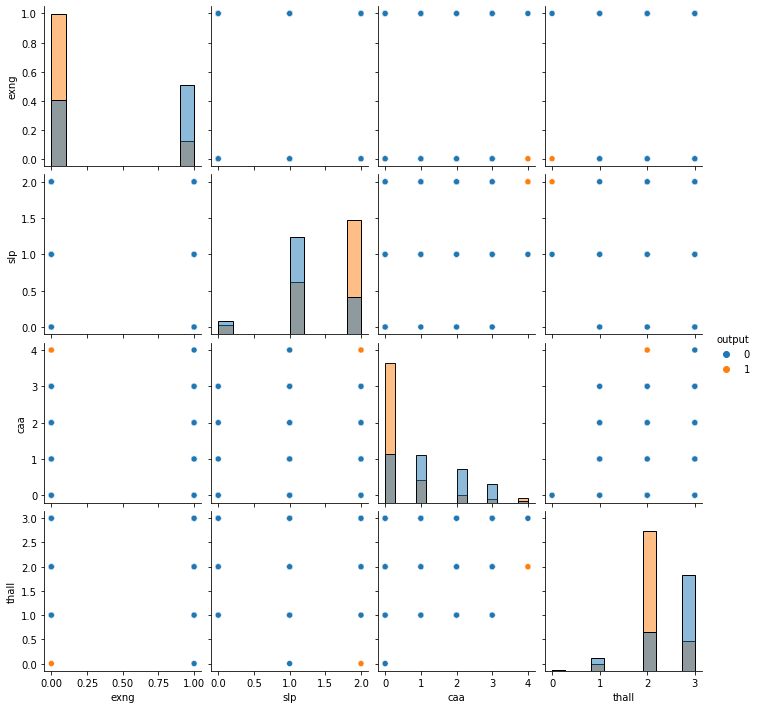

In [126]:
# 類別型欄位與y視覺化
df_vis = pd.concat([df[obj_features[4:]], df['output']], axis=1)
sns.pairplot(df_vis, hue='output', diag_kind="hist")

In [102]:
# 透過視覺化整理出較有可能造成結果有差異的feature
viz_features = ['age', 'thalachh', 'oldpeak', 'sex', 'cp', 'exng', 'caa', 'thall', 'slp']

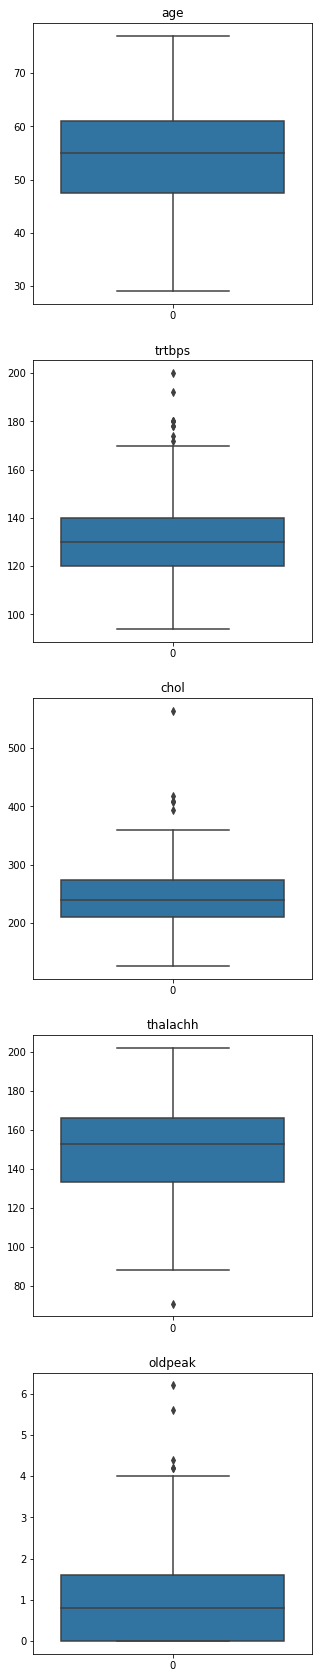

In [103]:
# 透過boxplot檢查outlier
plt.figure(figsize=(5,30))

for i in range(len(num_features)):
    plt.subplot(len(num_features), 1, i + 1)
    plt.title(num_features[i])
    sns.boxplot(data=X[num_features[i]])
# 透過背景知識決定消除chol的outlier

In [104]:
print(np.percentile(X['chol'], 1))
print(np.percentile(X['chol'], 98.5))

149.0
375.979999999999


<AxesSubplot:>

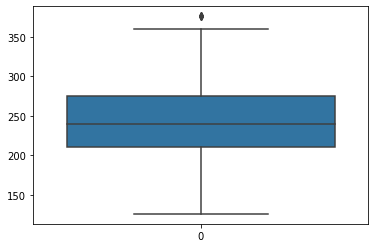

In [105]:
# 將極端值重設為第98.5百分位數
X['chol'].clip(upper=np.percentile(X['chol'], 98.5), inplace=True)
sns.boxplot(data=X['chol'])

In [106]:
# 建模
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 先把所有feature丟進去train 看 confusion matrix、feature importance和 permutation importance的結果進行進一步的特徵篩選
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [107]:
y_test.value_counts()

1    43
0    33
Name: output, dtype: int64

In [108]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion Matrix :')
print(confusion_matrix)
print('cv_score:', np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

# 在這個模型中最不希望出現的結果是右上角的 False negative，也就是真實為1預測卻為0，因此我們希望recall越高越好
print('recall_score:', metrics.recall_score(y_test, y_pred, zero_division=0))

Confusion Matrix :
[[40  3]
 [ 7 26]]
cv_score: 0.8156126482213437
recall_score: 0.9302325581395349


In [109]:
d = {'feature': X.columns, 'importance': forest.feature_importances_}
pd.DataFrame(data=d).sort_values(by=['importance'], ascending=False)

,feature,importance
11,caa,0.120794
7,thalachh,0.120289
12,thall,0.113983
2,cp,0.113213
9,oldpeak,0.108341
0,age,0.082543
4,chol,0.078682
3,trtbps,0.077717
8,exng,0.066589
1,sex,0.050099


In [110]:
import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importance: 針對模型結果、每次分別拿掉其中一個變數，看前後準確度的落差大不大，來決定這個變數重不重要
# 若該變數影響越大，則把他打亂會讓準確度下降愈多

perm = PermutationImportance(forest, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0789 ± 0.0235,caa
0.0632 ± 0.0453,thall
0.0500 ± 0.0510,cp
0.0395 ± 0.0288,sex
0.0184 ± 0.0129,age
0.0132 ± 0.0166,oldpeak
0.0079 ± 0.0129,slp
0.0079 ± 0.0211,exng
0.0079 ± 0.0211,trtbps
0.0026 ± 0.0105,fbs


In [111]:
# 先前視覺化觀察的結果與 feature importance和 permutation importance大致相近，這些是較重要的feature
print(viz_features)

['age', 'thalachh', 'oldpeak', 'sex', 'cp', 'exng', 'caa', 'thall', 'slp']


In [112]:
# 篩選出重要的feature再進行一次建模，看各項指標有沒有變好
X_viz = X[viz_features]
X_train, X_test, y_train, y_test = train_test_split(X_viz, y, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion Matrix :')
print(confusion_matrix)
print('cv_score:', np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

# 在這個模型中最不希望出現的結果是右上角的 False negative，也就是真實為1預測卻為0，因此我們希望recall越高越好
print('recall_score:', metrics.recall_score(y_test, y_pred, zero_division=0))

Confusion Matrix :
[[37  6]
 [ 8 25]]
cv_score: 0.8065217391304348
recall_score: 0.8604651162790697


In [113]:
six = ['caa','thalachh','thall','cp','oldpeak','age']  # 兩個importance都在前六名的feature
X = df.drop('output', axis=1)
X_six = X[six]
X_train, X_test, y_train, y_test = train_test_split(X_six, y, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion Matrix :')
print(confusion_matrix)
print('cv_score:', np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

# 在這個模型中最不希望出現的結果是右上角的 False negative，也就是真實為1預測卻為0，因此我們希望recall越高越好
print('recall_score:', metrics.recall_score(y_test, y_pred, zero_division=0))

Confusion Matrix :
[[39  4]
 [ 9 24]]
cv_score: 0.7978260869565217
recall_score: 0.9069767441860465


結果feature數最多時預測效果最好，random forest可能越多feature越好，接著看看decision tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('output', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion Matrix :')
print(confusion_matrix)
print('cv_score:', np.mean(cross_val_score(dtree, X_train, y_train, cv=10)))

# 在這個模型中最不希望出現的結果是右上角的 False negative，也就是真實為1預測卻為0，因此我們希望recall越高越好
print('recall_score:', metrics.recall_score(y_test, y_pred, zero_division=0))

Confusion Matrix :
[[34  9]
 [ 9 24]]
cv_score: 0.7889328063241108
recall_score: 0.7906976744186046


In [116]:
X_viz = X[viz_features]
X_train, X_test, y_train, y_test = train_test_split(X_viz, y, random_state=0)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion Matrix :')
print(confusion_matrix)
print('cv_score:', np.mean(cross_val_score(dtree, X_train, y_train, cv=10)))

# 在這個模型中最不希望出現的結果是右上角的 False negative，也就是真實為1預測卻為0，因此我們希望recall越高越好
print('recall_score:', metrics.recall_score(y_test, y_pred, zero_division=0))

Confusion Matrix :
[[34  9]
 [ 9 24]]
cv_score: 0.7932806324110672
recall_score: 0.7906976744186046


In [117]:
X = df.drop('output', axis=1)
X_six = X[six]
X_train, X_test, y_train, y_test = train_test_split(X_six, y, random_state=0)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion Matrix :')
print(confusion_matrix)
print('cv_score:', np.mean(cross_val_score(dtree, X_train, y_train, cv=10)))

# 在這個模型中最不希望出現的結果是右上角的 False negative，也就是真實為1預測卻為0，因此我們希望recall越高越好
print('recall_score:', metrics.recall_score(y_test, y_pred, zero_division=0))

Confusion Matrix :
[[40  3]
 [10 23]]
cv_score: 0.8106719367588934
recall_score: 0.9302325581395349


cv_score、precision都在6 feature下表現最好，recall 高達93%。因此我們接下來做第三個model(使用6 feature)視覺化
隨著feature縮減model表現越來越好，可見decision tree需要去除資料中的雜訊才能表現得更好

In [121]:
d2 = {'feature': X_six.columns, 'importance': dtree.feature_importances_}
pd.DataFrame(data=d2).sort_values(by=['importance'], ascending=False)

,feature,importance
3,cp,0.474578
0,caa,0.260099
2,thall,0.122277
4,oldpeak,0.074891
1,thalachh,0.053875
5,age,0.014280


In [80]:
y_train.value_counts()

1    122
0    105
Name: output, dtype: int64

[Text(1860.0, 3171.0, 'cp <= 0.5\ngini = 0.497\nsamples = 227\nvalue = [105, 122]\nclass = 1'),
 Text(930.0, 2265.0, 'caa <= 0.5\ngini = 0.397\nsamples = 110\nvalue = [80, 30]\nclass = 0'),
 Text(465.0, 1359.0, 'thall <= 2.5\ngini = 0.497\nsamples = 50\nvalue = [23, 27]\nclass = 1'),
 Text(232.5, 453.0, 'gini = 0.358\nsamples = 30\nvalue = [7, 23]\nclass = 1'),
 Text(697.5, 453.0, 'gini = 0.32\nsamples = 20\nvalue = [16, 4]\nclass = 0'),
 Text(1395.0, 1359.0, 'age <= 63.5\ngini = 0.095\nsamples = 60\nvalue = [57, 3]\nclass = 0'),
 Text(1162.5, 453.0, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]\nclass = 0'),
 Text(1627.5, 453.0, 'gini = 0.32\nsamples = 15\nvalue = [12, 3]\nclass = 0'),
 Text(2790.0, 2265.0, 'oldpeak <= 1.95\ngini = 0.336\nsamples = 117\nvalue = [25, 92]\nclass = 1'),
 Text(2325.0, 1359.0, 'thalachh <= 152.5\ngini = 0.273\nsamples = 104\nvalue = [17, 87]\nclass = 1'),
 Text(2092.5, 453.0, 'gini = 0.451\nsamples = 35\nvalue = [12, 23]\nclass = 1'),
 Text(2557.5, 453.0, 'gi

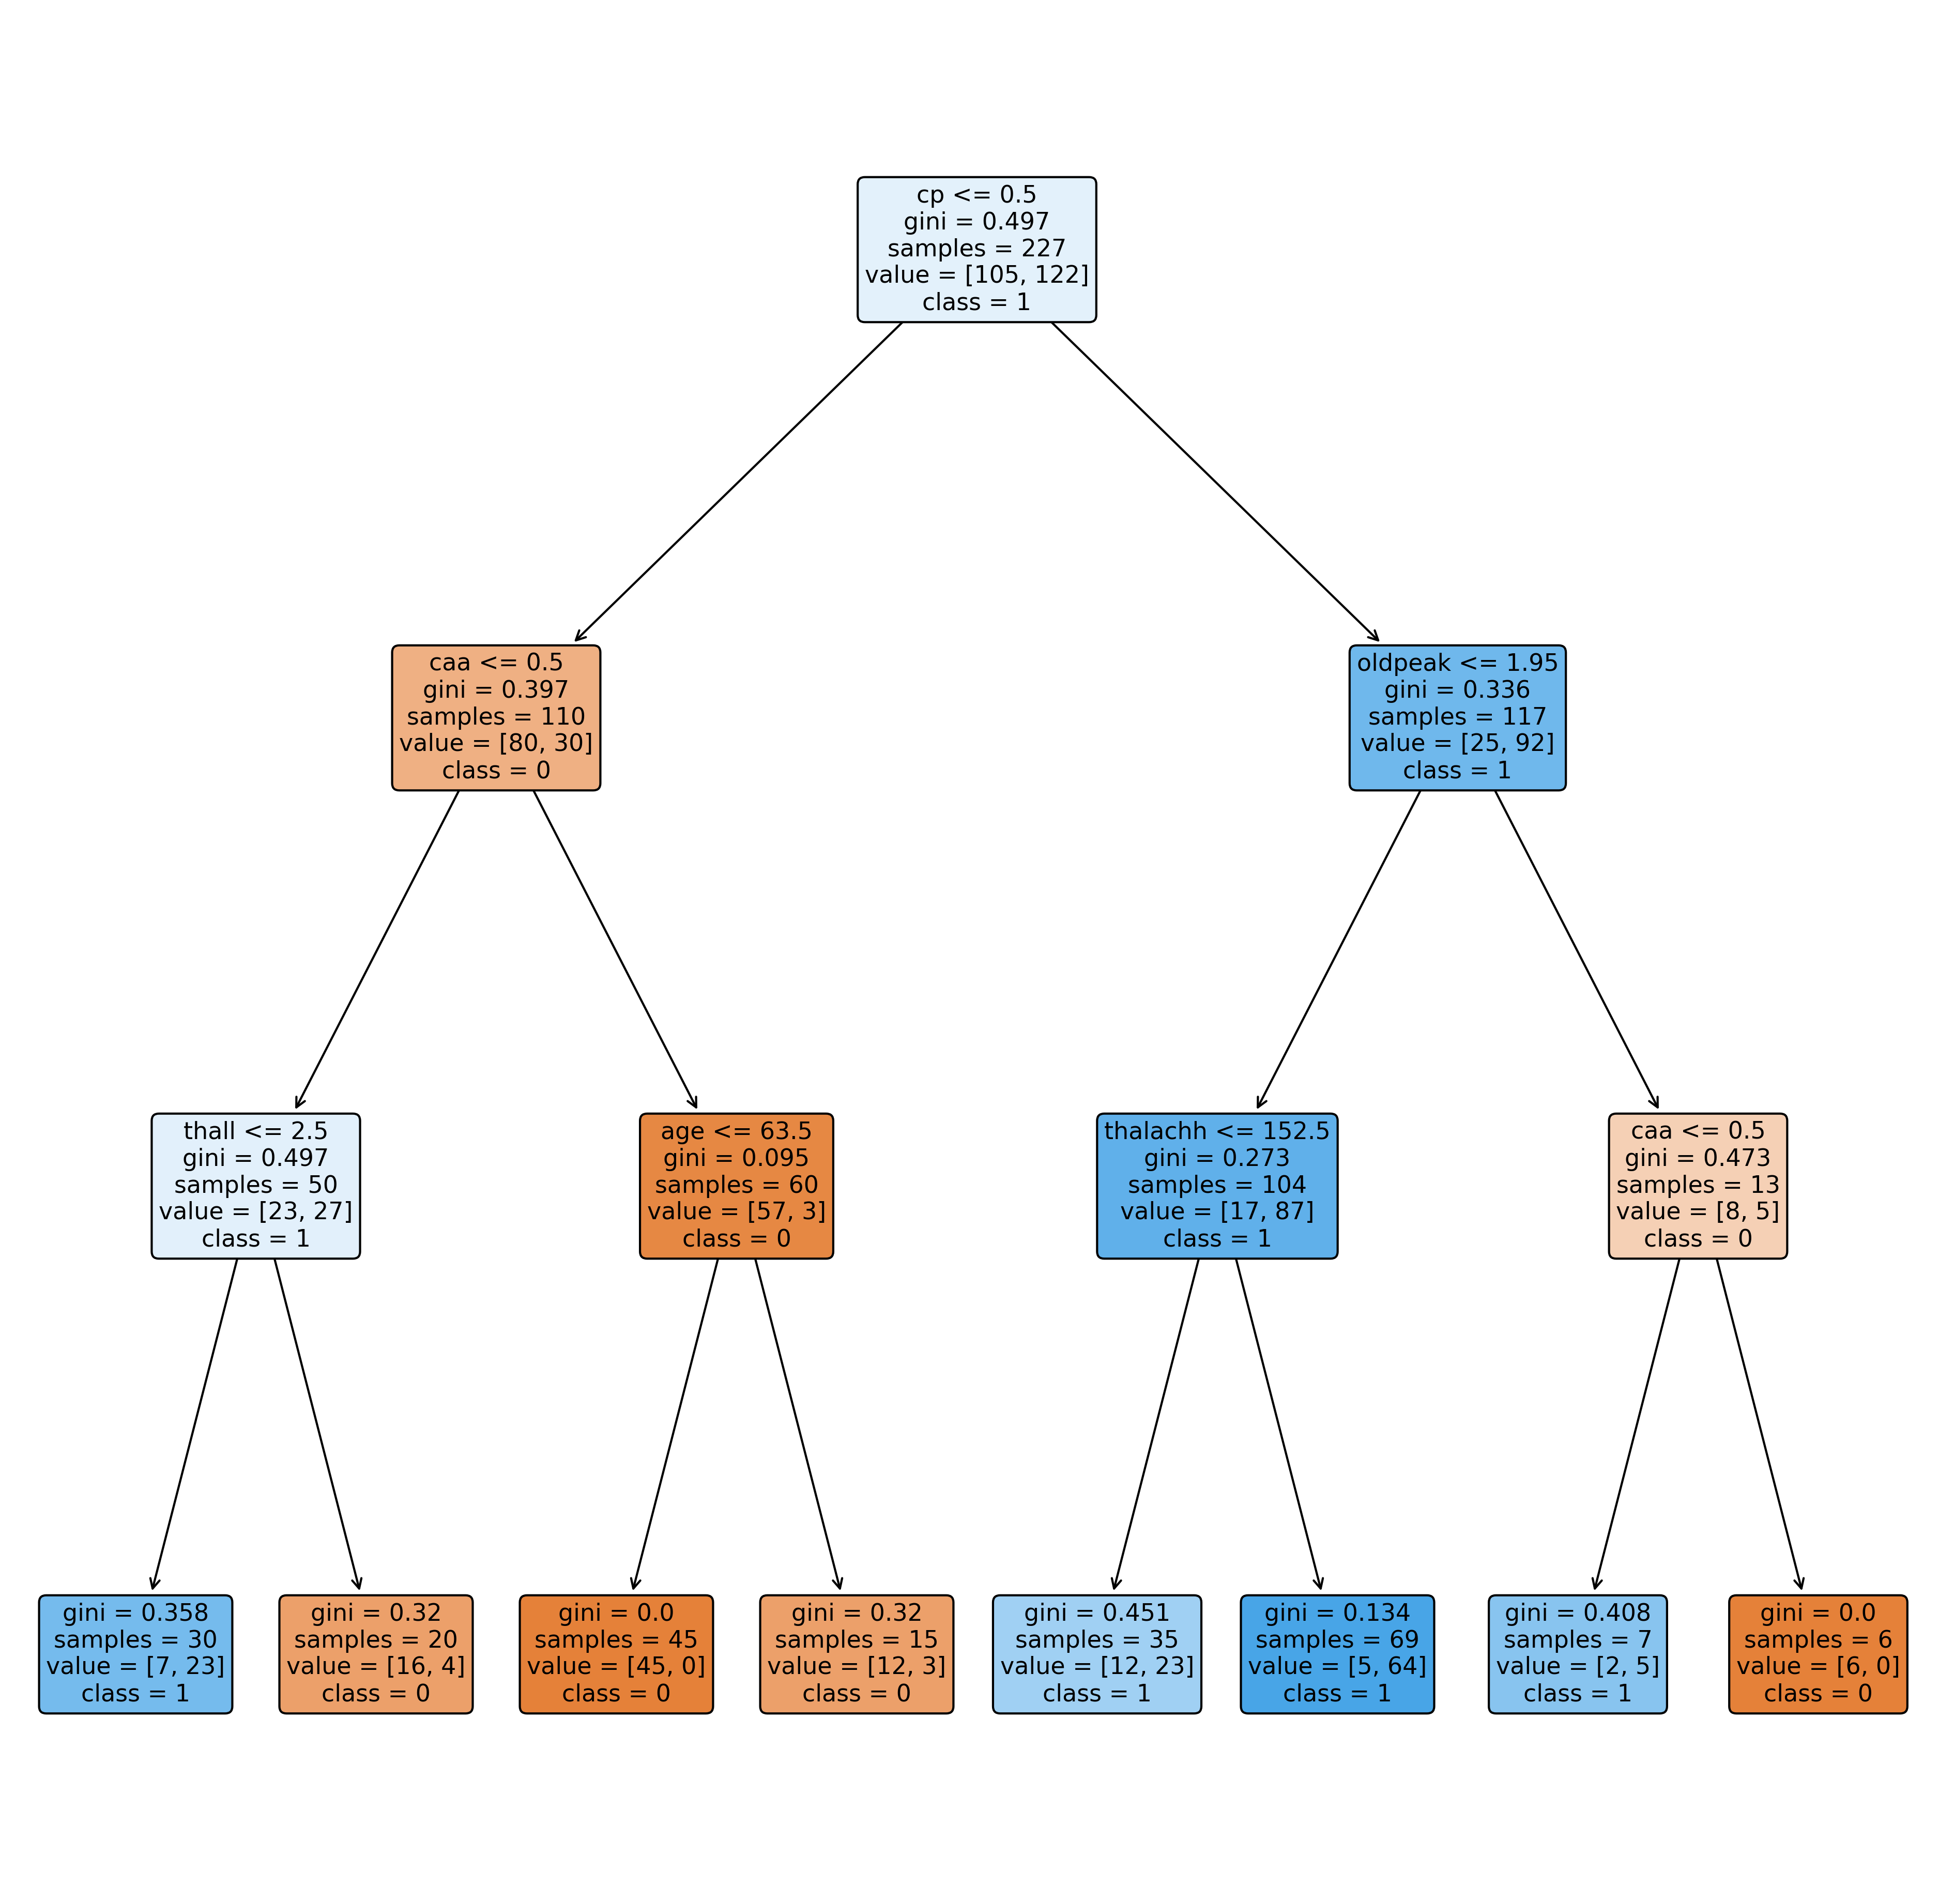

In [119]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=300)
fn = six
cn = ['0', '1']
tree.plot_tree(dtree, feature_names=fn, class_names=cn, filled=True, rounded=True)

從此圖可看出decision tree如何預測病人有無心臟病風險
ex. 
chest pain = 1, 2, 3 便有較高機率成為高風險族群
chest pain = 0 ，但caa = 0 並且 thall <= 2.5 也被歸類為高風險族群

In [114]:
"""
重要變因視覺化、age和高血壓分組encoding
'cp': Chest Pain type
'caa': number of major vessels (0-3)
'thall': Thal rate
'oldpeak': Previous peak
'thalachh': maximum heart rate achieved
'age':
"""

In [168]:
# 將決策樹判定為1，且gini係數最低的資料抓出來
df_risk = df[df['cp'] > 0.5]
df_risk = df_risk[df_risk['oldpeak'] <= 1.95]
df_risk = df_risk[df_risk['thalachh'] > 152.5]
df_remain = df.drop(list(df_risk.index), axis=0)

for index, row in df.iterrows():
    if index in df_risk.index.to_list():
        df.loc[index, 'classified'] = 'risk'
    else:
        df.loc[index, 'classified'] = 'remain'

In [169]:
df_risk.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,50.381443,0.618557,1.711340,130.216495,244.556701,0.154639,0.618557,168.969072,0.082474,0.432990,1.690722,0.412371,2.185567,0.896907
std,8.496866,0.488264,0.676368,17.212052,58.876454,0.363439,0.488264,10.130866,0.276515,0.592087,0.546977,0.886855,0.416581,0.305660
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,153.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,44.000000,0.000000,1.000000,120.000000,204.000000,0.000000,0.000000,162.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,52.000000,1.000000,2.000000,130.000000,235.000000,0.000000,1.000000,169.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000
75%,56.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,174.000000,0.000000,0.800000,2.000000,0.000000,2.000000,1.000000
max,71.000000,1.000000,3.000000,192.000000,564.000000,1.000000,1.000000,202.000000,1.000000,1.900000,2.000000,4.000000,3.000000,1.000000


<Figure size 1152x576 with 0 Axes>

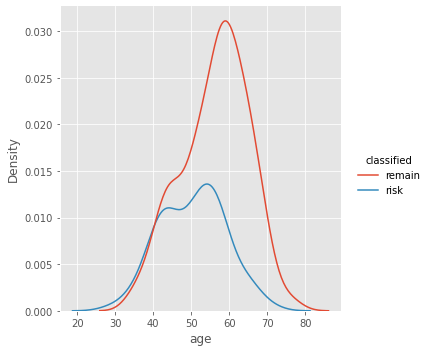

In [170]:
selected_columns = ['age', 'sex', 'caa', 'thall']

plt.figure(figsize=(16,8))
sns.displot(data=df, x="age", kind='kde', hue='classified')

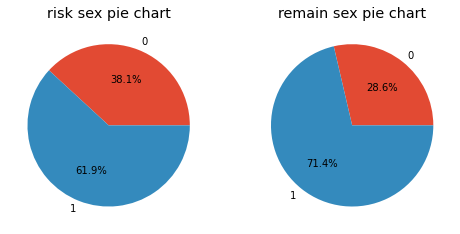

In [175]:
plt.style.use('ggplot')
plt.figure(figsize=(8,16))
plt.subplot(1, 2, 1)
plt.title('risk sex pie chart')
plt.pie(df_risk.groupby('sex').size(), labels=['0', '1'], autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('remain sex pie chart')
plt.pie(df_remain.groupby('sex').size(), labels=['0', '1'], autopct='%1.1f%%')
plt.show()